# Practica 1 Regresión y Clasificación con Modelos Lineales y Logísticos

## Ejercicio 1. Regresion lineal
### 1.1
Realice un script (o un Jupyter notebook) de Python en el que se obtengan los pesos (𝜔0, 𝜔1 y 𝜔2) que forman la ecuación de la recta que se ajusta a la relación entre los datos de entrada y de salida. Para ello utilice funciones de alto nivel de la librería scikit-learn y adjunte en la memoria el valor de los pesos obtenidos.

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

x1 = np.arange(1,11)
x2 = np.ones(10)

Ye = np.array([1.56, 1.95, 2.44, 3.05, 3.81, 4.77, 5.96, 7.45, 9.31, 11.64])

Xi = np.vstack((x1,x2)).T

print(Xi, Ye)

mdl = LinearRegression().fit(Xi,Ye)

print("Intercept(w0):", mdl.intercept_)

# Pesos del modelo de regresion lineal
print("Pesos del modelo: ", mdl.coef_)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]] [ 1.56  1.95  2.44  3.05  3.81  4.77  5.96  7.45  9.31 11.64]
Intercept(w0): -0.7053333333333338
Pesos del modelo:  [1.07260606 0.        ]


W0 es el corte con el Eje Z.
W2 es cero porque se trabaja con todos los puntos en un mismo plano.

### 1.2
Represente en una figura en 3D el conjunto de datos de entrenamiento, así como la recta que mejor se ajusta a los datos de acuerdo con los valores de los pesos obtenidos en el apartado anterior. Se recomienda usar la librería Matplotlib.

Text(0.5, 0, 'Ye')

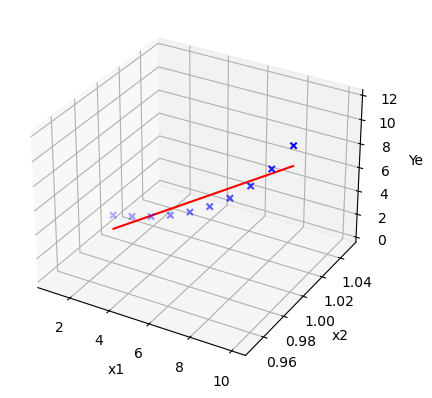

In [47]:
w0 = mdl.intercept_
w1 = mdl.coef_[0]
w2 = mdl.coef_[1]

# Creamos la figura
fig = plt.figure()

# Agregamos un plano 3D
ax = plt.axes(projection='3d')

# Para la recta obtenemos la prediccion con los valores del entrenamiento y
# se muestra graficamente utilizando la entrada del dataset y los valores predecidos
ry = mdl.predict(Xi)
ax.plot(x1, x2, ry, c='red')

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
ax.scatter(x1, x2, Ye,  c='b', marker='x')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Ye')


### 1.3
¿Cree que una recta es la función que mejor se ajusta a la relación entre los datos de entrada y de salida? En caso contrario, indique cuál es la función que mejor se ajustaría.

No, la función que mejor se ajusta a la relación entre los datos de entrada y de salida es uns exponencial.

## Ejercicio 2. Funcion de coste

### 2.1
Realice un script (o un Jupyter notebook) de Python en el que se represente en 3D la función de coste a partir de logaritmo de la verosimilitud (asumiendo que el error sigue una distribución de tipo Gaussiana, de media cero y desviación típica la unidad) para w2 = 0, de tal forma que se aprecie el área donde dicha función presenta los valores máximos.

Text(0.5, 0.92, 'J(W) a partir de Log V(w)')

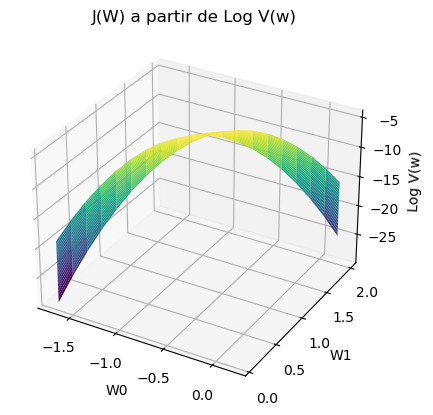

In [48]:
import math

n_datos = 20

w0 = -0.705 - n_datos/20
w1 = 1.073 - n_datos/20
w2 = 0

w0_arr = np.ones(n_datos)
w1_arr = np.ones(n_datos)

n = len(x1)
J = np.ones((n_datos,n_datos))

for i in range(n_datos):
    w0_arr[i] = w0 + 0.1*i
    w1_arr[i] = w1 + 0.1*i


sumatorio = 0
verosimilitud = np.ones((n_datos,n_datos))
media = 0
desv_tip = 1

for i in range(n_datos):
    for j in range (n_datos):
        for k in range(n):
            sumatorio = sumatorio + (Ye[k] - (w0_arr[i] + w1_arr[j]*x1[k] + w2*x2[k]))**2
        
        J[i][j] = 1/(2*n)*sumatorio
        verosimilitud[i][j] = n*math.log10(1/math.sqrt(2*math.pi*desv_tip)) - 1/((desv_tip)**2) * J[i][j]
        sumatorio = 0


# Creamos la figura
fig2 = plt.figure()

# Agregamos un plano 3D
ax2 = plt.axes(projection='3d')

# Crear la trama de malla (mesh)
surf = ax2.plot_surface(w0_arr, w1_arr, verosimilitud, cmap='viridis')

# Agregar etiquetas y título
ax2.set_xlabel('W0')
ax2.set_ylabel('W1')
ax2.set_zlabel('Log V(w)')
ax2.set_title('J(W) a partir de Log V(w)')


## Ejercicio 3. Regresion logistica

### 3.1
Realice un script (o un Jupyter notebook) de Python que construya el modelo de clasificador basado en regresión logística, utilizando funciones de alto nivel de scikit-learn. Adjunte en la memoria los pesos del modelo generado.


In [49]:
from sklearn.linear_model import LogisticRegression

x1 = [0.89, 0.41, 0.04, 0.75, 0.15, 0.14, 0.61, 0.25, 0.32, 0.40, 1.26, 1.68, 1.23, 1.46, 1.38, 1.54, 1.99, 1.76, 1.98, 1.23]
x2 = [0.41, 0.39, 0.61, 0.17, 0.19, 0.09, 0.32, 0.77, 0.23, 0.74, 1.53, 1.05, 1.76, 1.60, 1.86, 1.99, 1.93, 1.41, 1.00, 1.54]
x3 = [0.69, 0.82, 0.83, 0.29, 0.31, 0.52, 0.33, 0.83, 0.81, 0.56, 1.21, 1.22, 1.33, 1.10, 1.75, 1.75, 1.54, 1.34, 1.83, 1.55]
X = np.vstack((x1,x2,x3)).T
Y = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])


mdl = LogisticRegression(penalty="none").fit(X,Y)

print("Intercept(w0):", mdl.intercept_)

# Pesos del modelo de regresion lineal
print("Pesos del modelo: ", mdl.coef_)

Intercept(w0): [1.91474791]
Pesos del modelo:  [[-0.27473348 -0.73403497 -0.90436503]]


/home/danikg/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


### 3.2
Represente en una figura las entradas y la clase a la que pertenece cada uno de los datos de entrenamiento, así como la predicción de cada una de las entradas utilizando el modelo creado en el apartado anterior. Nota: utilice distintos marcadores y colores de forma que se puedan distinguir las clases y el tipo de salida (de los datos de entrenamiento o de la predicción a partir del modelo). Se recomienda usar la librería Matplotlib.

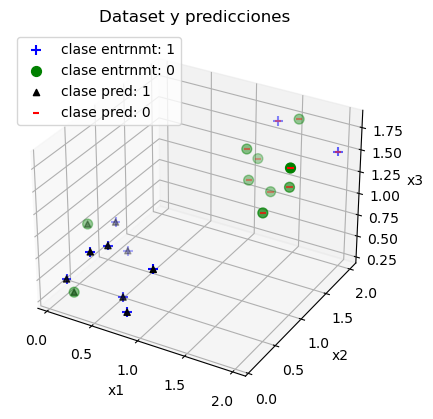

In [50]:
# Creamos la figura
fig3 = plt.figure()

# Agregamos un plano 3D
ax3 = plt.axes(projection='3d')

x1_entrnm_cl0 = []
x2_entrnm_cl0 = []
x3_entrnm_cl0 = []
x1_entrnm_cl1 = []
x2_entrnm_cl1 = []
x3_entrnm_cl1 = []

# Representacion del dataset de entrenamiento
for i in range(len(Y)):
    if Y[i] == 1:
        x1_entrnm_cl1.append(x1[i])
        x2_entrnm_cl1.append(x2[i])
        x3_entrnm_cl1.append(x3[i])
    else:
        x1_entrnm_cl0.append(x1[i])
        x2_entrnm_cl0.append(x2[i])
        x3_entrnm_cl0.append(x3[i])
        
ax3.scatter(x1_entrnm_cl1, x2_entrnm_cl1, x3_entrnm_cl1,  c='b', marker='+', s=50, label='clase entrnmt: 1')
ax3.scatter(x1_entrnm_cl0, x2_entrnm_cl0, x3_entrnm_cl0,  c='g', marker='o', s=50, label='clase entrnmt: 0')

Ye = mdl.predict(X)

x1_pred_cl0 = []
x2_pred_cl0 = []
x3_pred_cl0 = []
x1_pred_cl1 = []
x2_pred_cl1 = []
x3_pred_cl1 = []

# Representacion del dataset de entrenamiento
for i in range(len(Ye)):
    if Ye[i] == 1:
        x1_pred_cl1.append(x1[i])
        x2_pred_cl1.append(x2[i])
        x3_pred_cl1.append(x3[i])
    else:
        x1_pred_cl0.append(x1[i])
        x2_pred_cl0.append(x2[i])
        x3_pred_cl0.append(x3[i])
        
ax3.scatter(x1_pred_cl1, x2_pred_cl1, x3_pred_cl1,  c='k', marker='^', label='clase pred: 1')
ax3.scatter(x1_pred_cl0, x2_pred_cl0, x3_pred_cl0,  c='r', marker='_', label='clase pred: 0')

# Agregar etiquetas y título
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('x3')
ax3.set_title('Dataset y predicciones')

ax3.legend()

### 3.3
¿Cuál es el error en porcentaje que presenta el modelo sobre los datos de entrenamiento? ¿A qué puede ser debido?

In [52]:
N = 20
err = 0

for i in range(20):
    if Ye[i] != Y[i]:
        err += 1

percent = err/N * 100
print("Porcentaje de error: ", percent)


Porcentaje de error:  20.0
